the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/tmp/ipykernel_22817/2209663916.py:26: RuntimeWarning: Mean of empty slice
  combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)


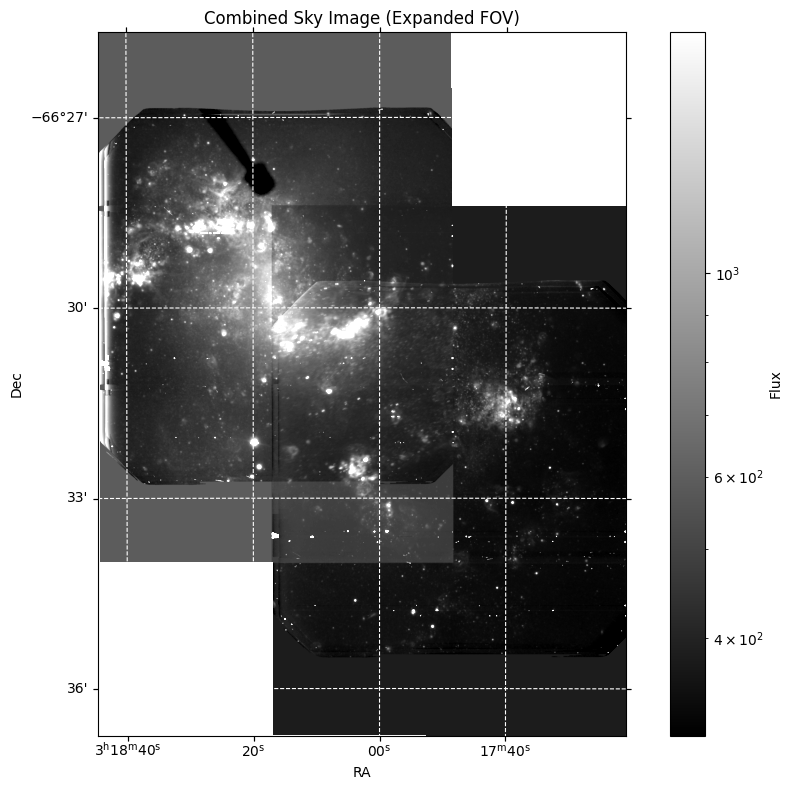

In [3]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Load both FITS files
hdul1 = fits.open('../mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Compute an output WCS and shape that includes both images
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])

# Reproject both images onto the common WCS
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)

# Combine the two images (e.g., average, sum, max)
combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)
combined = np.where(combined > 0, combined, np.nan)  # Safe for LogNorm

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=new_wcs)
norm = LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99))
im = ax.imshow(combined, origin='lower', cmap='gray', norm=norm)
ax.set_title('Combined Sky Image (Expanded FOV)')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.grid(color='white', ls='--')

plt.colorbar(im, ax=ax, label='Flux')
plt.tight_layout()
plt.show()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
/tmp/ipykernel_5910/1589044906.py:30: RuntimeWarning: Mean of empty slice
  combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)


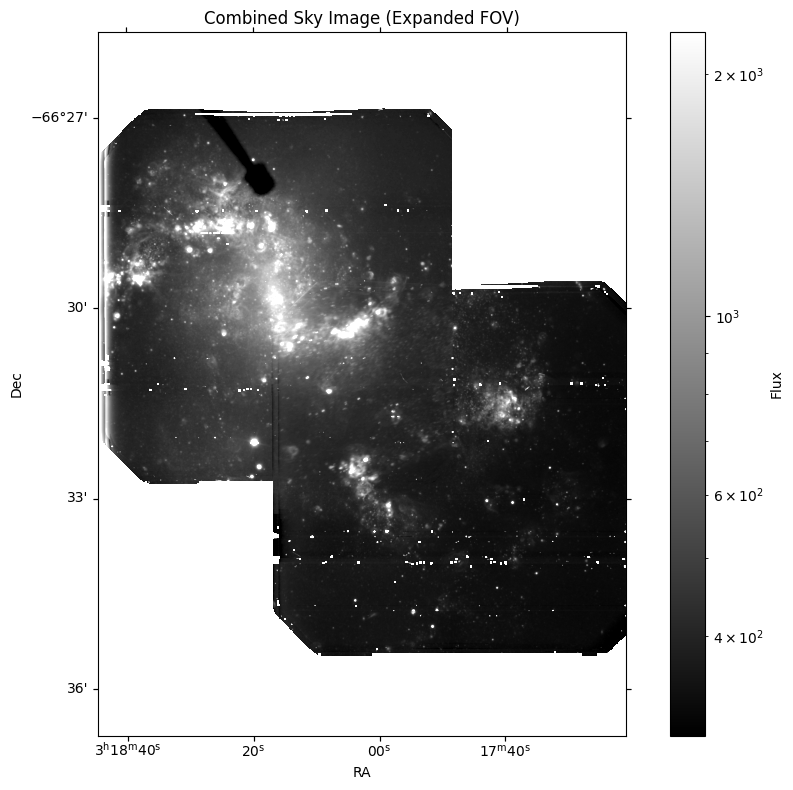

In [3]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Load both FITS files
hdul1 = fits.open('../mrgS20190730S0157_add.fits')
data1 = hdul1['SCI'].data
wcs1 = WCS(hdul1['SCI'].header)

hdul2 = fits.open('../mrgS20190730S0160_add.fits')
data2 = hdul2['SCI'].data
wcs2 = WCS(hdul2['SCI'].header)

# Replace specific values with NaN
data1 = np.where(data1 == 593.67285, np.nan, data1)
data2 = np.where(data2 == 380.0607, np.nan, data2)

# Compute an output WCS and shape that includes both images
new_wcs, new_shape = find_optimal_celestial_wcs([(data1, wcs1), (data2, wcs2)])

# Reproject both images onto the common WCS
reproj1, _ = reproject_interp((data1, wcs1), new_wcs, shape_out=new_shape)
reproj2, _ = reproject_interp((data2, wcs2), new_wcs, shape_out=new_shape)

# Combine the two images (e.g., average)
combined = np.nanmean(np.array([reproj1, reproj2]), axis=0)
combined = np.where(combined > 0, combined, np.nan)  # Optional: mask non-positive values

# Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=new_wcs)
norm = LogNorm(vmin=np.nanpercentile(combined, 1), vmax=np.nanpercentile(combined, 99))
im = ax.imshow(combined, origin='lower', cmap='gray', norm=norm)
ax.set_title('Combined Sky Image (Expanded FOV)')
ax.set_xlabel('RA')
ax.set_ylabel('Dec')
#ax.grid(color='white', ls='--')

plt.colorbar(im, ax=ax, label='Flux')
plt.tight_layout()
plt.show()